### Analysis of simulated data based on AR(p) model  

#### Import libraries  

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.ar_model import AutoReg

#### Parameters  

In [21]:
np.random.seed(13)

n = 200

phi = np.array( [0.9, -0.8, 0.7] )  # (new .. old)
p = phi.shape[0]
std = 0.5 # sqrt(var)

epsilon = np.random.randn(n)*std  # (old .. new)
#print(epsilon[:3])  # debug

c = 1.0

max_lags = 10

In [22]:
p

3

#### Generate time series based on AR(p)    
- Y_0..p-1 = 0
- Y_t = c + Sigma(i=1..p) [ phi[i] * Y_t-i ] + eps_t (t >= p)

In [23]:
y = epsilon[:p]
#y = np.ones(p)
for i in range(p, n):
    #print(i, phi, y[:-p-1:-1], epsilon[i])  # debug
    yt = c + np.dot(phi, y[:-p-1:-1]) + epsilon[i]
    y = np.append(y, yt)
y = pd.Series(y)

In [38]:
n

200

#### Plot  

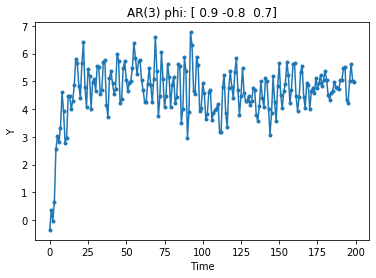

In [24]:
plt.plot(y, marker='.')
plt.title('AR({}) phi: {}'.format(p, phi))
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

#### Fitting of AR(p) model  

In [25]:
model = AutoReg(y, lags=p, trend='n')
results = model.fit()

#### Check the best AR model  

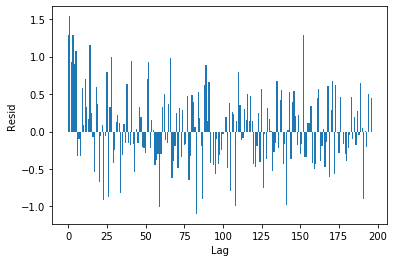

In [26]:
resid = results.resid
plt.bar(range(len(resid)), resid)
plt.xlabel('Lag')
plt.ylabel('Resid')
plt.show()

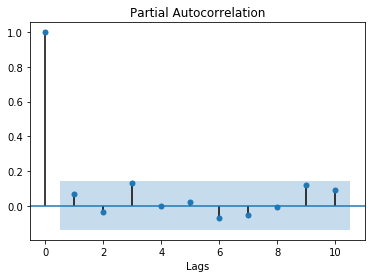

In [27]:
tsaplots.plot_pacf(resid, lags=max_lags)
plt.xlabel('Lags')
plt.show()

#### Prediction  

In [28]:
y_pred = results.predict()
print(y_pred.shape)
print(y_pred.head())

(200,)
0         NaN
1         NaN
2         NaN
3   -0.627683
4    1.005377
dtype: float64


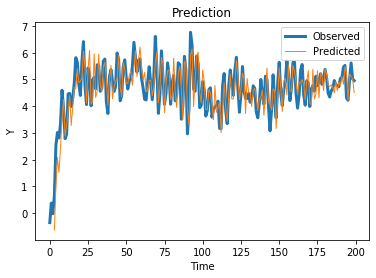

In [29]:
plt.plot(y, label='Observed', linewidth=3)
plt.plot(y_pred, label='Predicted', linewidth=1)
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Y')
plt.legend()
plt.show()

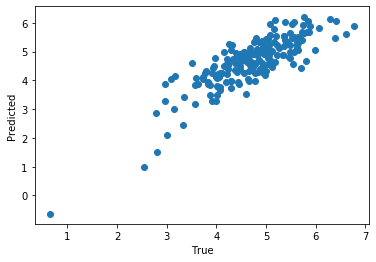

In [30]:
plt.scatter(y, y_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

#### Prediction error  

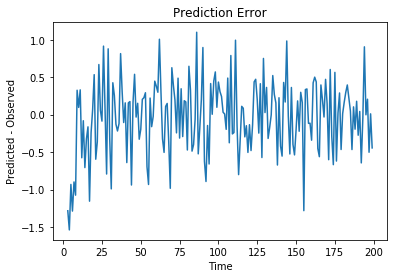

In [31]:
plt.plot(y_pred-y)
plt.title('Prediction Error')
plt.xlabel('Time')
plt.ylabel('Predicted - Observed')
plt.show()

#### Show the obtained parameters  

In [32]:
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(3)   Log Likelihood                -140.447
Method:               Conditional MLE   S.D. of innovations              0.494
Date:                Tue, 20 Oct 2020   AIC                             -1.371
Time:                        22:31:46   BIC                             -1.305
Sample:                             3   HQIC                            -1.344
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           1.0440      0.043     24.524      0.000       0.961       1.127
y.L2          -0.8448      0.061    -13.919      0.000      -0.964      -0.726
y.L3           0.8031      0.043     18.816      0.0

#### Phi  

In [33]:
print(results.params)

y.L1    1.044044
y.L2   -0.844753
y.L3    0.803149
dtype: float64


#### Std (sqrt(sigma2))  

In [34]:
print(np.sqrt(results.sigma2))

0.49361095029992835


#### c  

In [35]:
print( np.mean(y) * (1 - np.sum(results.params)) )

-0.011282738743137198
